# Базовые алгоритмы машинного обучения. Регрессионный анализ.

## Задание

1. Разработать программу реализующую построение полиномиальной регрессии для анализа загруженности телекоммуникационной сети кампуса. (Исходным данными являются данные об объеме трафика в течение недели).
2. Вычислить коэффициенты полиномиальной регрессии различное степени и определить какая регрессионная зависимость минимизирует квадрат ошибки на тестовой выборке.
3. Построить график регрессионной зависимости, нанесенный поверх обучающих и тестовых данных. Показать зависимость величины ошибки от изменения степени полинома регрессии.

## Подключение необходимых библиотек

`%matplotlib inline` -> визуализирует графики с matplotlib прямо в jupyter notebook, а не в отдельном окне

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression # Линейная регрессия
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Исходные данные (Вариант 3)

Данные загруженности сети от объема трафика.

In [2]:
x = np.array([0.0, 0.20134228187919462, 0.40268456375838924, 0.6040268456375839, 0.8053691275167785, 1.006711409395973, 1.2080536912751678, 1.4093959731543624, 1.610738255033557, 1.8120805369127515, 2.013422818791946, 2.2147651006711406, 2.4161073825503356, 2.61744966442953, 2.8187919463087248, 3.0201342281879193, 3.221476510067114, 3.4228187919463084, 3.624161073825503, 3.8255033557046976, 4.026845637583892, 4.228187919463087, 4.429530201342281, 4.630872483221476, 4.832214765100671, 5.033557046979865, 5.23489932885906, 5.4362416107382545, 5.6375838926174495, 5.838926174496644, 6.040268456375839, 6.241610738255033, 6.442953020134228, 6.644295302013423, 6.845637583892617, 7.046979865771812, 7.248322147651006, 7.449664429530201, 7.651006711409395, 7.85234899328859, 8.053691275167784, 8.25503355704698, 8.456375838926174, 8.657718120805368, 8.859060402684563, 9.060402684563758, 9.261744966442953, 9.463087248322147, 9.664429530201343, 9.865771812080537, 10.06711409395973, 10.268456375838925, 10.46979865771812, 10.671140939597315, 10.872483221476509, 11.073825503355703, 11.275167785234899, 11.476510067114093, 11.677852348993287, 11.879194630872483, 12.080536912751677, 12.281879194630871, 12.483221476510066, 12.684563758389261, 12.885906040268456, 13.08724832214765, 13.288590604026846, 13.48993288590604, 13.691275167785234, 13.892617449664428, 14.093959731543624, 14.295302013422818, 14.496644295302012, 14.697986577181208, 14.899328859060402, 15.100671140939596, 15.30201342281879, 15.503355704697986, 15.70469798657718, 15.906040268456374, 16.10738255033557, 16.308724832214764, 16.51006711409396, 16.711409395973153, 16.91275167785235, 17.11409395973154, 17.315436241610737, 17.516778523489933, 17.718120805369125, 17.91946308724832, 18.120805369127517, 18.32214765100671, 18.523489932885905, 18.7248322147651, 18.926174496644293, 19.12751677852349, 19.328859060402685, 19.530201342281877, 19.731543624161073, 19.932885906040266, 20.13422818791946, 20.335570469798657, 20.53691275167785, 20.738255033557046, 20.93959731543624, 21.140939597315434, 21.34228187919463, 21.543624161073826, 21.744966442953018, 21.946308724832214, 22.147651006711406, 22.348993288590602, 22.550335570469798, 22.75167785234899, 22.953020134228186, 23.154362416107382, 23.355704697986575, 23.55704697986577, 23.758389261744966, 23.95973154362416, 24.161073825503355, 24.36241610738255, 24.563758389261743, 24.76510067114094, 24.96644295302013, 25.167785234899327, 25.369127516778523, 25.570469798657715, 25.77181208053691, 25.973154362416107, 26.1744966442953, 26.375838926174495, 26.57718120805369, 26.778523489932883, 26.97986577181208, 27.18120805369127, 27.382550335570468, 27.583892617449663, 27.785234899328856, 27.98657718120805, 28.187919463087248, 28.38926174496644, 28.590604026845636, 28.79194630872483, 28.993288590604024, 29.19463087248322, 29.395973154362416, 29.597315436241608, 29.798657718120804, 30.0]).reshape((-1, 1))
y = np.array([251.70172701238204, 246.45458471994715, 208.68918378268228, 132.29726038684805, 235.58462256228287, 215.91112148690516, 287.4834833574085, 246.1964494865603, 199.00215246503012, 214.53618128715848, 206.47371359521225, 223.12668677422462, 263.5709317993286, 194.79663478444803, 259.8968368558984, 217.43933347555372, 342.92278561614177, 182.69336363358025, 260.5891390523995, 184.59418282190924, 227.43062855689877, 235.43243330133475, 227.4572358048627, 239.3157414976747, 265.8593007343122, 206.07474392826688, 159.53550400572584, 203.97640328645343, 97.45770419963107, 186.756631252483, 148.4048080035949, 139.50480567310723, 160.84730832560123, 225.66018625198288, 144.89364870672338, 128.13151458098986, 189.33565005002973, 122.34735809160306, 136.7447828863393, 192.8097244002737, 244.70314763017018, 149.1851013791819, 167.5156753708892, 137.64515459970488, 136.84803460675727, 178.44471662470625, 210.0070635220689, 139.3739159667333, 119.16484811823184, 200.9326768642165, 215.03772764773151, 129.77446468140178, 203.54046997426036, 210.3127117428006, 136.08687988021302, 174.25266799946795, 163.434206698606, 133.59046620583058, 244.3914967385016, 213.19701599435467, 166.69889407024974, 236.14911436408767, 256.7194605058262, 205.4126843504173, 174.98830885006683, 166.36513524223182, 216.54932316982118, 180.12865174208193, 194.7914666285234, 184.62424951490365, 220.5924374892239, 218.73996948862435, 235.3234861723866, 274.1707728105925, 286.3326983339189, 205.9585729164426, 256.31437170769857, 207.43976357381837, 175.97827557052486, 324.31433276874793, 231.4083419474836, 246.5831272229259, 237.31459665256958, 193.4847212521456, 270.7024698832697, 215.24946136568235, 180.16321676537547, 248.93860002520026, 307.70976814606956, 196.06704820399494, 163.5659377946792, 205.46469404722893, 196.45115164096774, 219.9053986422801, 197.22770133070145, 217.90493824444505, 204.6456474588692, 251.01693373217927, 207.31983091870853, 243.46362130572447, 316.394508596637, 218.32108457481615, 201.13686864982674, 239.2132768084021, 170.20870633509762, 220.21633774975237, 215.4133889037762, 235.308462956878, 257.64758798147, 215.86827197409818, 260.3801095920413, 214.88730191644873, 332.71187620763004, 160.55934519328318, 199.6185220732446, 184.13467088102854, 248.06596327983266, 222.4117694274085, 268.06975170925364, 302.65560502011004, 252.8489099113718, 164.8823374136181, 225.26277823665686, 251.6851632914844, 269.93164203691913, 225.416146033928, 307.2258230344682, 283.1431566406112, 280.002572907057, 173.90641934245787, 256.29998611303233, 303.0335744939043, 279.7137935804833, 338.8554219691287, 296.5046603245705, 315.0837044227389, 332.00738495557766, 260.0387502907301, 332.5806209348113, 356.9115851604785, 316.68788288354864, 357.29126928003814, 335.3742168528768, 308.73507278378787, 404.91053766915616, 372.59795817270685, 372.6000513580405, 423.3958716725938, 391.07708763198013, 380.775965200874])

## Реализация алгоритма линейной регрессии

С помощью `sklearn.linear_mode`.

In [3]:
linear_model = LinearRegression() # Создаем объект (экземпляр) класса линейной модели
linear_model.fit(x, y); # Обучаем нашу модель

Делаем предсказания с помощью нашей полученной модели.

In [4]:
pred = linear_model.predict(x)

Проверим точность модели с помощью коэффициента детерминации $R^2$.
 - Коэффициент детерминации (R2) рассматривают, как правило, в качестве основного показателя, отражающего меру качества регрессионной модели, описывающей связь между зависимой и независимыми переменными модели.

In [5]:
value_score = linear_model.score(x, y)
print("Коэффициент детерминации R^2 нашей модели (точность нашей модели) =", value_score)

Коэффициент детерминации R^2 нашей модели (точность нашей модели) = 0.29396458726033325


**Коэффициент детерминации $R^2$ далек от 1. Линейная регрессия не лучшим образом описывает связь между зависимой и независимой переменными модели.** Попробуем составить полиномиальное преобразование (X) и совершить предсказание с той же моделью, чтобы посмотреть увеличиться ли точность нашей модели. Для этого воспользуемся `Scikit-learn PolynomialFeatures`.

Основные свойства линейной регрессии, которую мы получили:

In [6]:
print("Характеристика обученной модели линейной регрессии:")
print("y = k * x + b")
print("k =", linear_model.coef_)
print("b =", linear_model.intercept_)

Характеристика обученной модели линейной регрессии:
y = k * x + b
k = [3.94939762]
b = 170.04942136765132


### Построим график линейной регрессии

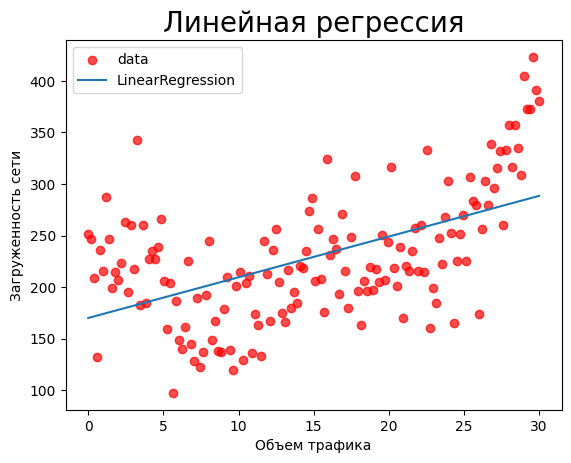

In [7]:
fig, ax = plt.subplots()
ax.scatter(x, y, c='red' ,alpha=0.7 ,label="data")
ax.plot(x, pred, linewidth = 1.5 ,label="LinearRegression")
ax.set_title("Линейная регрессия", fontsize=20)
ax.set_xlabel("Объем трафика") # Подписываем ось X
ax.set_ylabel("Загруженность сети") # Подписываем ось Y
ax.legend(loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)
plt.show()

## Реализация алгоритма полиномиальной регрессии

С помощью `Scikit-learn PolynomialFeatures`.

Реализуем полиномиальную регрессию для полинома 2-ой степени и посмотрим как изменился коэффициент детерминации $R^2$.

In [8]:
pf = PolynomialFeatures(2) # default=2
x_poly = pf.fit_transform(x)

In [9]:
linear_model.fit(x_poly, y); # Полиномиальная регрессия - полином 2-ой степени.

Делаем предсказания с помощью нашей полученной модели.

In [10]:
pred_poly = linear_model.predict(x_poly)

Проверим точность модели с помощью коэффициента детерминации $R^2$.

In [11]:
value_score = linear_model.score(x_poly, y)
print("Коэффициент детерминации R^2 нашей модели (точность нашей модели) =", value_score)

Коэффициент детерминации R^2 нашей модели (точность нашей модели) = 0.5232086511311649


**Коэффициент детерминации $R^2$ для полиномиальной регрессии полинома 2-ой степени выше, чем для линейной регрессии.** Попробуем рассмотреть полиномы высших степеней, может быть там есть те, что будут еще лучше описывать нашу модель.

### Построим график полиномиальной регрессии полинома 2-ой степени

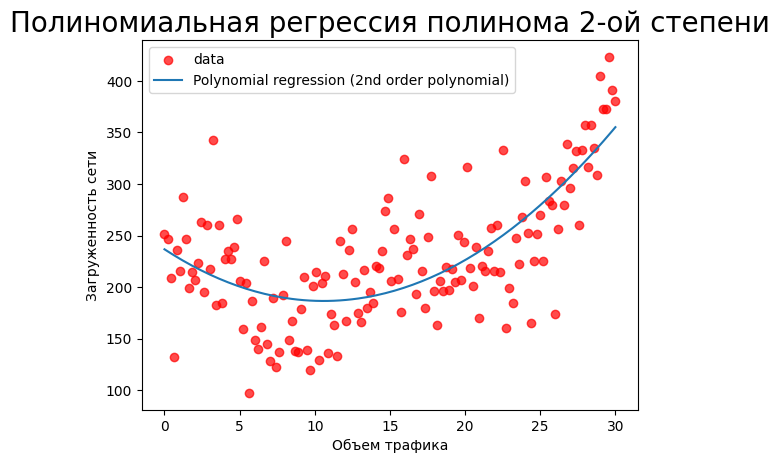

In [12]:
fig, ax = plt.subplots()
ax.scatter(x, y, c='red' ,alpha=0.7 ,label="data")
ax.plot(x, pred_poly, linewidth = 1.5 ,label="Polynomial regression (2nd order polynomial)")
ax.set_title("Полиномиальная регрессия полинома 2-ой степени", fontsize=20)
ax.set_xlabel("Объем трафика") # Подписываем ось X
ax.set_ylabel("Загруженность сети") # Подписываем ось Y
ax.legend(loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)
plt.show()

**TODO: analyze which degree of the polynomial will give the best accuracy and implement it.**